In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
small = []
tmp = [x.strip().split(",") for x in open("communities/small_communities.csv").readlines()]
for elts in tmp:
    for elt in elts:
        small.append(elt)

In [3]:
mappings = pickle.load(open("communities/subreddit_to_community.pcl", "rb"))
headers = ["Subreddit" if dim == 0 else str(dim) for dim in range(301)]
df = pd.read_csv("sentences.combined", sep="\t| ", names=headers)

for s in small:
    # Get names of indexes for which column Age has value 30
    indexNames = df[df["Subreddit"] == "__label__" + s].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames, inplace=True)


class_mapping = []
for sr in df["Subreddit"]:
    class_mapping.append(mappings[sr[9:]])
    
indices = df.index.tolist()

<ipython-input-3-36ed86fb15c5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("sentences.combined", sep="\t| ", names=headers)


In [4]:
df

,Subreddit,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
2,__label__Misogynyfetish,0.003737,-0.065243,0.072177,0.015236,0.009507,-0.035961,0.056810,0.063589,-0.009339,...,-0.018312,0.026735,-0.008762,-0.045209,0.047740,-0.018907,0.016313,0.013476,0.057201,-0.037861
4,__label__ratemyboobs,0.051816,-0.014539,0.042992,0.005781,0.034771,0.000621,0.019550,0.076402,0.036739,...,0.020326,0.037404,0.002685,0.017969,0.028820,0.017509,0.083323,0.019856,0.041376,-0.031374
5,__label__CelebDPP,0.024543,-0.099519,0.033680,0.037752,-0.002448,-0.016806,0.097413,0.014160,0.019932,...,-0.003794,0.040261,-0.030422,-0.020440,0.021354,0.026270,0.012409,-0.007217,0.071255,-0.004576
8,__label__BustyPetite,0.032883,0.019812,-0.014637,0.011218,0.042149,-0.006528,0.023847,0.060452,0.006977,...,0.021319,0.081131,-0.002608,-0.061510,0.024329,-0.027603,0.107560,-0.002657,0.058571,-0.070044
9,__label__electricvehicles,0.005398,0.007141,0.090354,0.022378,0.009535,-0.018537,0.080592,0.058621,-0.006551,...,-0.043484,0.015745,-0.082539,-0.029734,-0.011968,0.018740,0.009135,0.006776,0.048814,0.020182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,__label__VerticalGifs,0.068399,0.008231,-0.144210,0.039713,0.118620,0.090154,-0.015666,0.129990,0.005776,...,0.053161,-0.023519,-0.200850,-0.030191,0.125630,-0.045237,0.193390,-0.041347,-0.102910,-0.196370
1172,__label__Daddy,0.040261,-0.079057,0.062886,0.012438,0.004776,-0.004248,0.057514,0.008431,0.041939,...,-0.037694,0.044034,0.022562,-0.006756,0.054786,-0.005992,0.006219,0.015313,0.063844,-0.014944
1173,__label__DegradingHoles,0.009752,-0.078586,0.086851,0.007237,0.002751,-0.031184,0.050158,0.056143,0.000507,...,-0.022961,0.027808,-0.010971,-0.042761,0.040938,-0.020024,0.012952,0.019121,0.069983,-0.007006
1176,__label__AMA,0.011297,-0.020756,0.079887,0.009949,-0.003375,-0.030948,0.094660,0.013038,-0.011066,...,-0.007250,0.027412,-0.011721,-0.009079,0.003873,0.008063,-0.016075,-0.022698,0.060626,0.008964


In [135]:
mappings = pickle.load(open("communities/subreddit_to_community.pcl", "rb"))
headers = ["Subreddit" if dim == 0 else str(dim) for dim in range(301)]
df = pd.read_csv("sentences.combined", sep="\t| ", names=headers)

for s in small:
    # Get names of indexes for which column Age has value 30
    indexNames = df[df["Subreddit"] == "__label__" + s].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames, inplace=True)


class_mapping = []
for sr in df["Subreddit"]:
    class_mapping.append(mappings[sr[9:]])
    
indices = df.index.tolist()

<ipython-input-135-36ed86fb15c5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("sentences.combined", sep="\t| ", names=headers)


In [136]:
indices = df.index.tolist()
with open("structural_communities.csv", "w") as f:
    med = [x.strip() for x in open("communities/medium_communities.csv").readlines()]
    for scommunity in med:
        scommunity = [indices.index(df.index[df['Subreddit'] == "__label__" + x].tolist()[0]) for x in scommunity.split(",")]
        f.write(",".join([str(x) for x in scommunity]) + "\n")
        
    lar = [x.strip() for x in open("communities/large_communities.csv").readlines()]
    for scommunity in lar:
        scommunity = [indices.index(df.index[df['Subreddit'] == "__label__" + x].tolist()[0]) for x in scommunity.split(",")]
        f.write(",".join([str(x) for x in scommunity]) + "\n")
del df["Subreddit"]

In [137]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

dist = ["euclidean", "cosine", "mahalanobis"]
link = ["ward", "complete", "average", "single"]

for d in dist:
    for l in link:
        Z = linkage(df, l)
        c, coph = cophenet(Z, pdist(df, d))
        print(d, l, c)

euclidean ward 0.3858582490399149
euclidean complete 0.7456213897309016
euclidean average 0.9344016868642098
euclidean single 0.8573148162015078
cosine ward 0.6237130435117247
cosine complete 0.7093069407943662
cosine average 0.6940885639708035
cosine single 0.5625017385266928
mahalanobis ward 0.08474506958593599
mahalanobis complete 0.26602018960515206
mahalanobis average 0.40771531546500345
mahalanobis single 0.4509518883509071


In [138]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

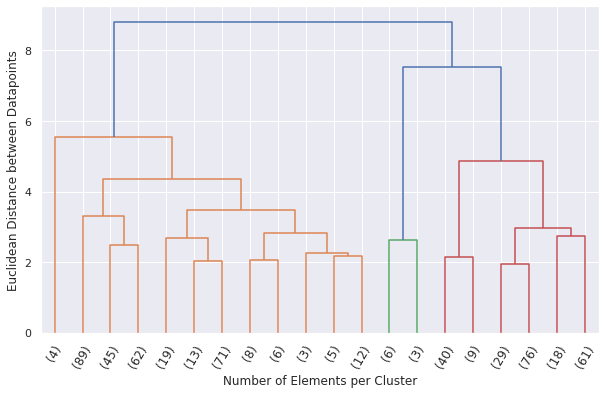

In [139]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity="euclidean", linkage="ward")
model = model.fit(df)

plt.figure(figsize=(10,6))
plot_dendrogram(model, truncate_mode='lastp', p=20)
plt.xticks(rotation=60)
plt.xlabel("Number of Elements per Cluster")
plt.ylabel("Euclidean Distance between Datapoints")
plt.savefig("dendrogram_topics.pdf")

In [140]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=len(np.unique(class_mapping)), affinity="euclidean", linkage="ward")
res = AC.fit_predict(df)

clustering = {}
for i, c in enumerate(res):
    if c not in clustering:
        clustering[c] = [i]
    else:
        clustering[c].append(i)
        
with open("topical_clusters.csv", "w") as f:
    for _,v in clustering.items():
        f.write(",".join([str(x) for x in v]) + "\n")

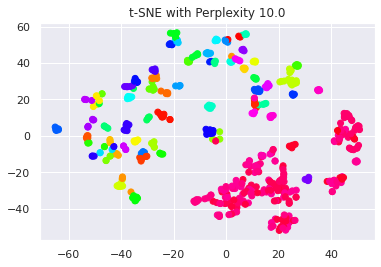

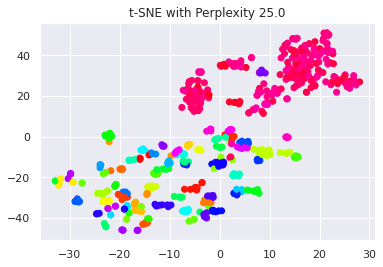

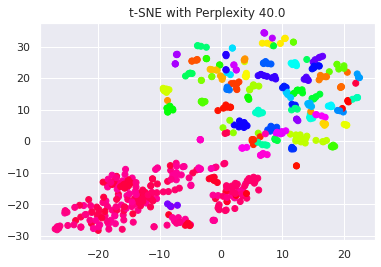

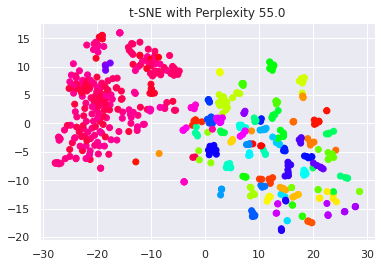

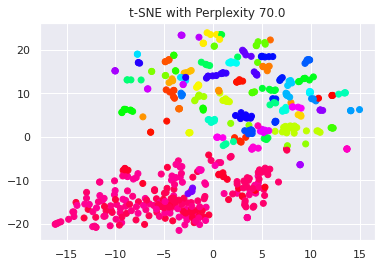

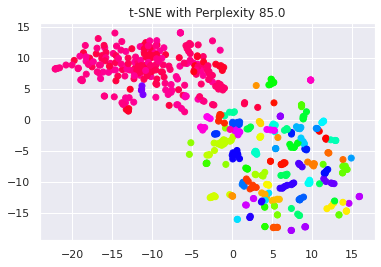

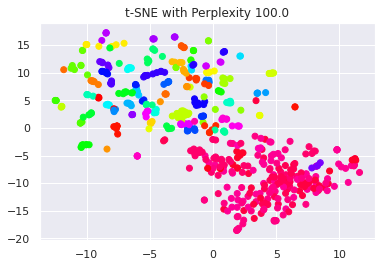

In [141]:
perplexities = np.linspace(10, 100, 7)

for ppl in perplexities:
    
    tsne = TSNE(n_components=2, perplexity=ppl)
    X = tsne.fit_transform(df)
    x, y = zip(*X)
    plt.get_cmap("hsv")
    plt.scatter(x,y, c=class_mapping, cmap="hsv")
    plt.title("t-SNE with Perplexity " + str(ppl))
    plt.savefig("tsne_topological_" + str(int(ppl)) + ".pdf")
    plt.show()

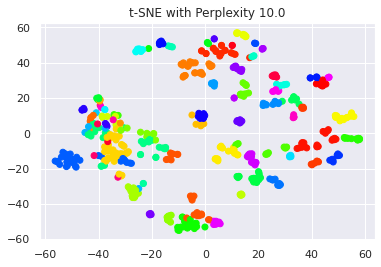

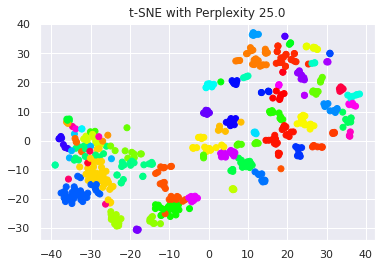

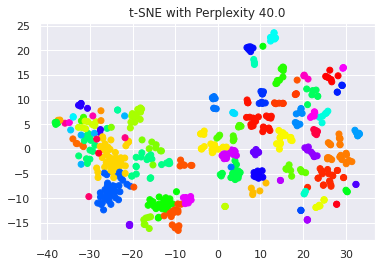

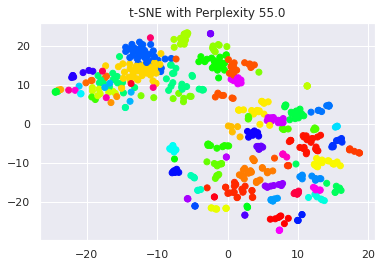

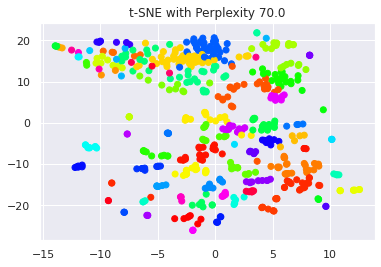

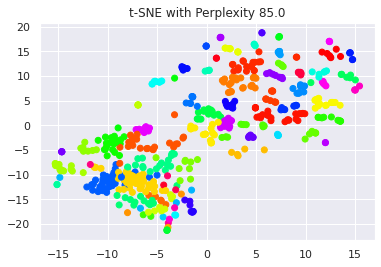

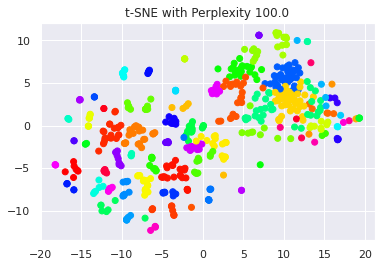

In [142]:
perplexities = np.linspace(10, 100, 7)

for ppl in perplexities:
    
    tsne = TSNE(n_components=2, perplexity=ppl)
    X = tsne.fit_transform(df)
    x, y = zip(*X)
    plt.get_cmap("hsv")
    plt.scatter(x,y, c=res, cmap="hsv")
    plt.title("t-SNE with Perplexity " + str(ppl))
    plt.savefig("tsne_topical_" + str(int(ppl)) + ".pdf")
    plt.show()